In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astropy import units as u
from pathlib import Path
import scipy

import setigen as stg

IMG_DIR = Path("../../docs/source/images/")

In [2]:
# Sometimes it can be necessary to re-run this command for plots to show automatically
%matplotlib inline

### Basic signal
First two plots on page

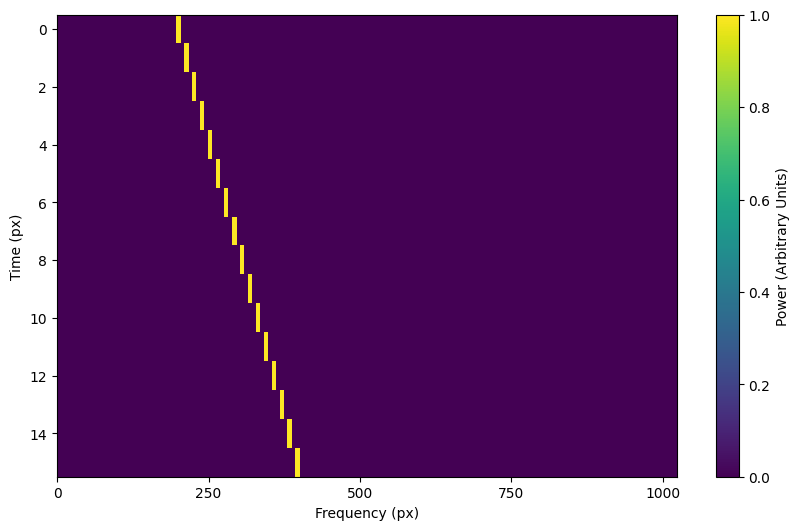

In [24]:
# Define time and frequency arrays, essentially labels for the 2D data array
fchans = 1024
tchans = 16
df = 2.7939677238464355*u.Hz
dt = 18.253611008*u.s
fch1 = 6095.214842353016*u.MHz

# Generate the signal
frame = stg.Frame(fchans=fchans,
                  tchans=tchans,
                  df=df,
                  dt=dt,
                  fch1=fch1)
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(200),
                                            drift_rate=2*u.Hz/u.s),
                          stg.constant_t_profile(level=1),
                          stg.box_f_profile(width=20*u.Hz),
                          stg.constant_bp_profile(level=1))
fig = plt.figure(figsize=(10, 6))
frame.plot("px", db=False)
fig.savefig(IMG_DIR / "basic_signal.png", bbox_inches='tight')
plt.show()

### Sine path

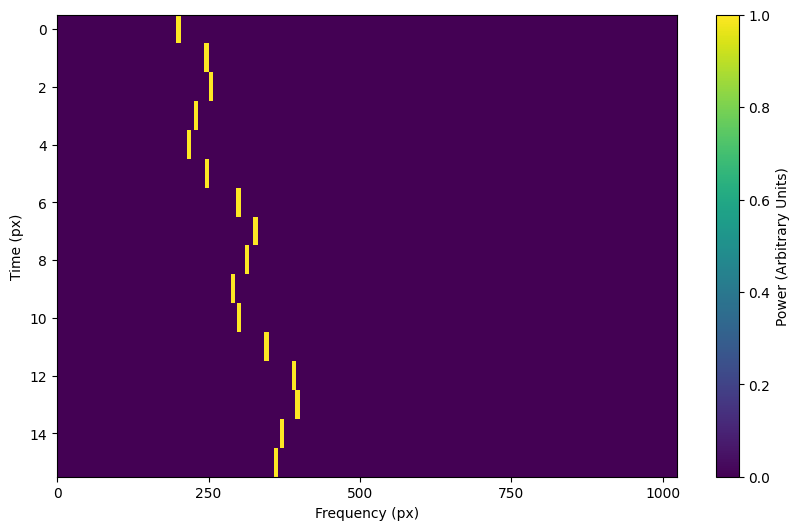

In [25]:
# Generate the signal
frame = stg.Frame(fchans=fchans,
                  tchans=tchans,
                  df=df,
                  dt=dt,
                  fch1=fch1)
signal = frame.add_signal(stg.sine_path(f_start=frame.get_frequency(200),
                                        drift_rate=2*u.Hz/u.s,
                                        period=100*u.s,
                                        amplitude=100*u.Hz),
                            stg.constant_t_profile(level=1),
                            stg.box_f_profile(width=20*u.Hz),
                            stg.constant_bp_profile(level=1))
fig = plt.figure(figsize=(10, 6))
frame.plot("px", db=False)
fig.savefig(IMG_DIR / "sine_signal.png", bbox_inches='tight')
plt.show()

### Squared path

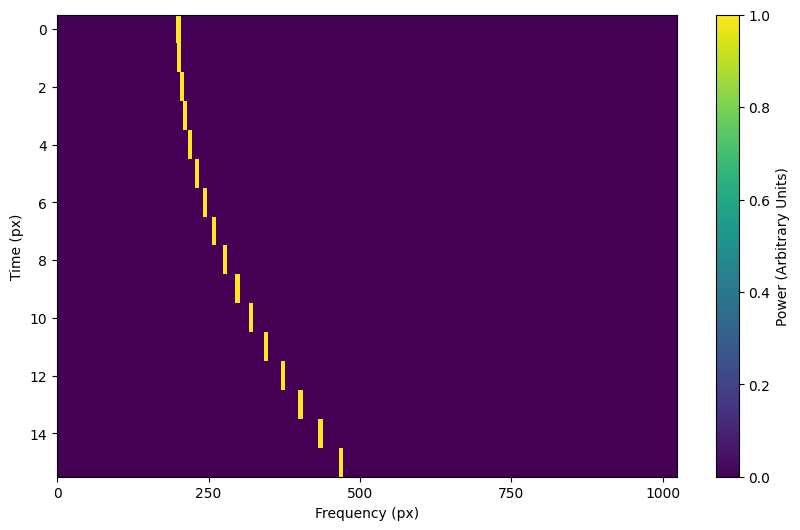

In [26]:
# Generate the signal
frame = stg.Frame(fchans=fchans,
                  tchans=tchans,
                  df=df,
                  dt=dt,
                  fch1=fch1)
signal = frame.add_signal(stg.squared_path(f_start=frame.get_frequency(200),
                                            drift_rate=0.02*u.Hz/u.s),
                            stg.constant_t_profile(level=1),
                            stg.box_f_profile(width=20*u.Hz),
                            stg.constant_bp_profile(level=1))
fig = plt.figure(figsize=(10, 6))
frame.plot("px", db=False)
fig.savefig(IMG_DIR / "squared_signal.png", bbox_inches='tight')
plt.show()

### RFI-like path

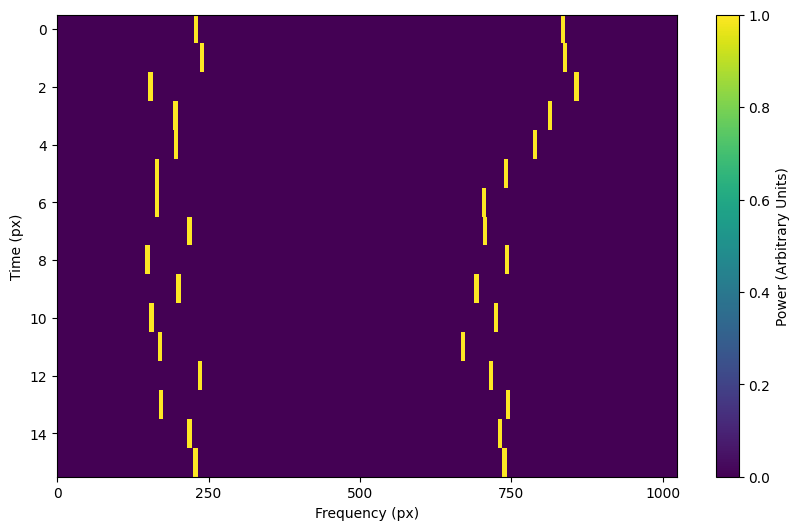

In [27]:
# Generate the signal
frame = stg.Frame(fchans=fchans,
                  tchans=tchans,
                  df=df,
                  dt=dt,
                  fch1=fch1)
frame.add_signal(stg.simple_rfi_path(f_start=frame.fs[200], 
                                        drift_rate=0*u.Hz/u.s,
                                        spread=300*u.Hz,
                                        spread_type='uniform',
                                        rfi_type='stationary'),
                    stg.constant_t_profile(level=1),
                    stg.box_f_profile(width=20*u.Hz),
                    stg.constant_bp_profile(level=1))

frame.add_signal(stg.simple_rfi_path(f_start=frame.fs[800], 
                                        drift_rate=-1*u.Hz/u.s,
                                        spread=300*u.Hz,
                                        spread_type='uniform',
                                        rfi_type='random_walk'),
                    stg.constant_t_profile(level=1),
                    stg.box_f_profile(width=20*u.Hz),
                    stg.constant_bp_profile(level=1))
fig = plt.figure(figsize=(10, 6))
frame.plot("px", db=False)
fig.savefig(IMG_DIR / "rfi_signal.png", bbox_inches='tight')
plt.show()

### Sine intensity

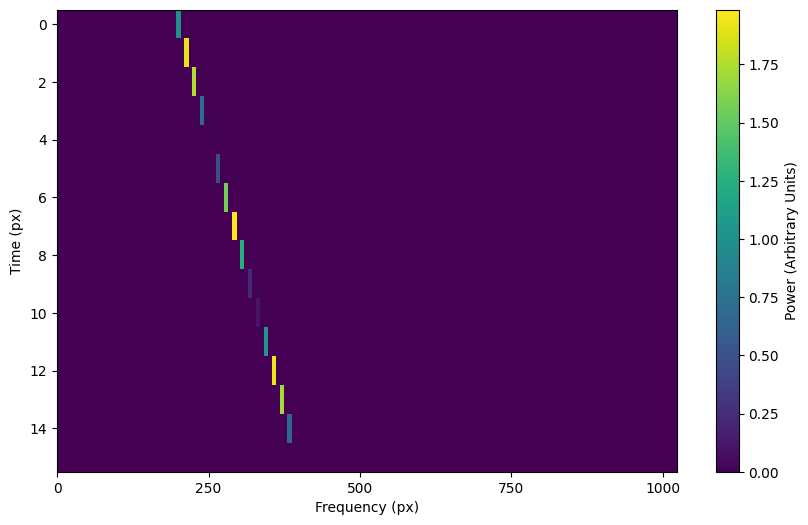

In [29]:
# Generate the signal
frame = stg.Frame(fchans=fchans,
                  tchans=tchans,
                  df=df,
                  dt=dt,
                  fch1=fch1)
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(200),
                                            drift_rate=2*u.Hz/u.s),
                            stg.sine_t_profile(period=100*u.s,
                                                amplitude=1,
                                                level=1),
                            stg.box_f_profile(width=20*u.Hz),
                            stg.constant_bp_profile(level=1))
fig = plt.figure(figsize=(10, 6))
frame.plot("px", db=False)
fig.savefig(IMG_DIR / "sine_intensity_1_1.png", bbox_inches='tight')
plt.show()

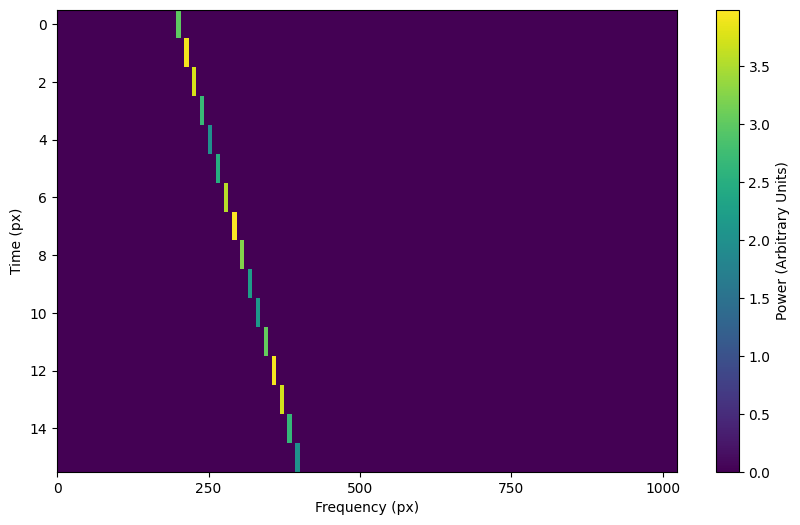

In [30]:
# Generate the signal
frame = stg.Frame(fchans=fchans,
                  tchans=tchans,
                  df=df,
                  dt=dt,
                  fch1=fch1)
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(200),
                                            drift_rate=2*u.Hz/u.s),
                            stg.sine_t_profile(period=100*u.s,
                                                amplitude=1,
                                                level=3),
                            stg.box_f_profile(width=20*u.Hz),
                            stg.constant_bp_profile(level=1))
fig = plt.figure(figsize=(10, 6))
frame.plot("px", db=False)
fig.savefig(IMG_DIR / "sine_intensity_1_3.png", bbox_inches='tight')
plt.show()

### Box intensity

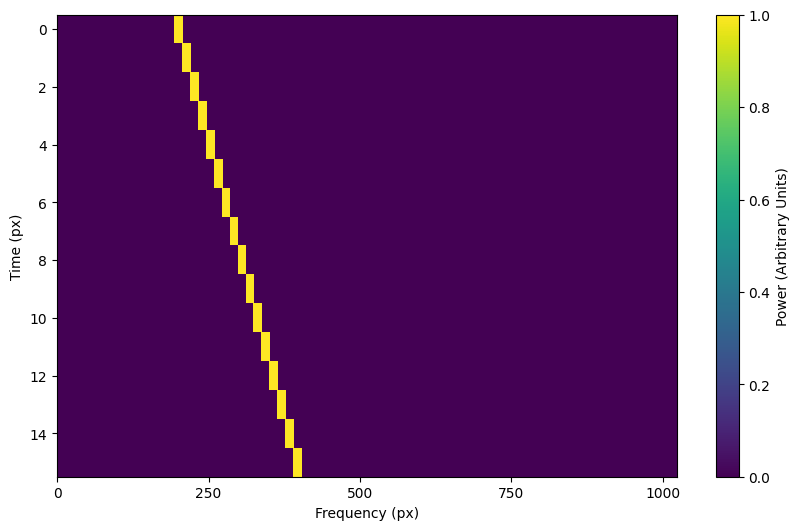

In [31]:
# Generate the signal
frame = stg.Frame(fchans=fchans,
                  tchans=tchans,
                  df=df,
                  dt=dt,
                  fch1=fch1)
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(200),
                                            drift_rate=2*u.Hz/u.s),
                            stg.constant_t_profile(level=1),
                            stg.box_f_profile(width=40*u.Hz),
                            stg.constant_bp_profile(level=1))
fig = plt.figure(figsize=(10, 6))
frame.plot("px", db=False)
fig.savefig(IMG_DIR / "box_profile.png", bbox_inches='tight')
plt.show()

### Gaussian intensity profile

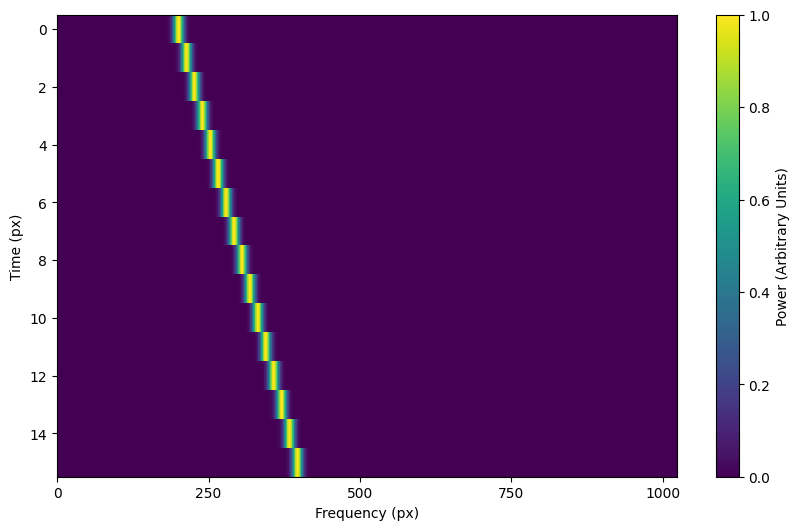

In [32]:
# Generate the signal
frame = stg.Frame(fchans=fchans,
                  tchans=tchans,
                  df=df,
                  dt=dt,
                  fch1=fch1)
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(200),
                                            drift_rate=2*u.Hz/u.s),
                            stg.constant_t_profile(level=1),
                            stg.gaussian_f_profile(width=40*u.Hz),
                            stg.constant_bp_profile(level=1))
fig = plt.figure(figsize=(10, 6))
frame.plot("px", db=False)
fig.savefig(IMG_DIR / "gaussian_profile.png", bbox_inches='tight')
plt.show()

### Sinc squared intensity profile

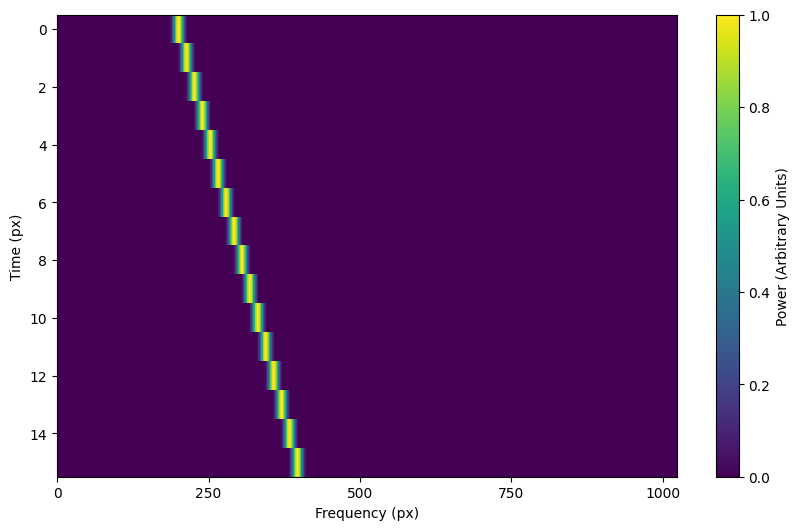

In [33]:
# Generate the signal
frame = stg.Frame(fchans=fchans,
                  tchans=tchans,
                  df=df,
                  dt=dt,
                  fch1=fch1)
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(200),
                                            drift_rate=2*u.Hz/u.s),
                            stg.constant_t_profile(level=1),
                            stg.sinc2_f_profile(width=40*u.Hz),
                            stg.constant_bp_profile(level=1))
fig = plt.figure(figsize=(10, 6))
frame.plot("px", db=False)
fig.savefig(IMG_DIR / "sinc2_profile.png", bbox_inches='tight')
plt.show()

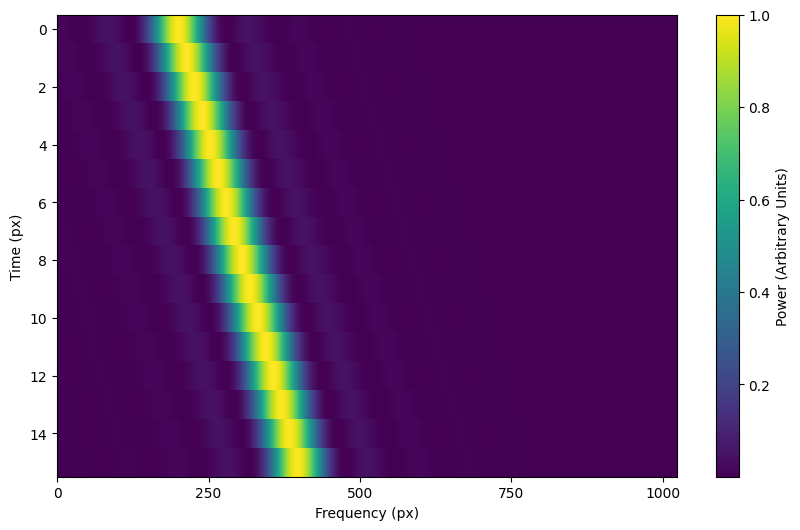

In [34]:
# Generate the signal
frame = stg.Frame(fchans=fchans,
                  tchans=tchans,
                  df=df,
                  dt=dt,
                  fch1=fch1)
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(200),
                                            drift_rate=2*u.Hz/u.s),
                            stg.constant_t_profile(level=1),
                            stg.sinc2_f_profile(width=200*u.Hz, trunc=False),
                            stg.constant_bp_profile(level=1))
fig = plt.figure(figsize=(10, 6))
frame.plot("px", db=False)
fig.savefig(IMG_DIR / "sinc2_profile_no_trunc.png", bbox_inches='tight')
plt.show()

### Multiple Gaussian intensity profile

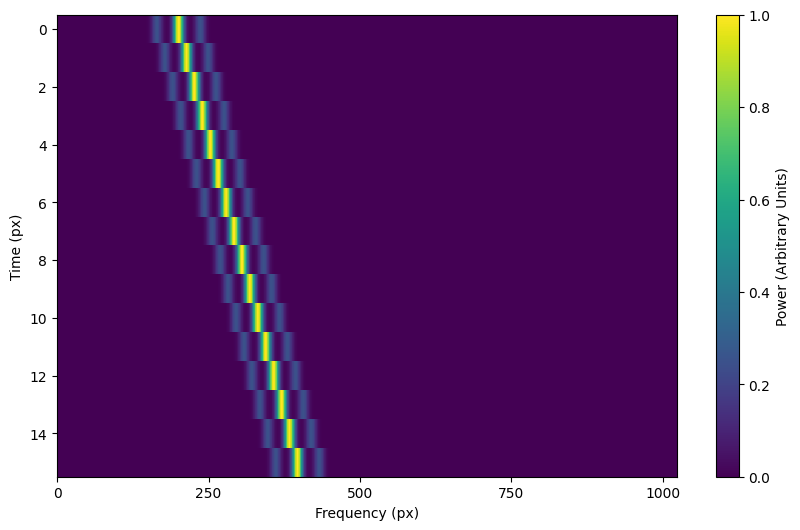

In [37]:
# Generate the signal
frame = stg.Frame(fchans=fchans,
                  tchans=tchans,
                  df=df,
                  dt=dt,
                  fch1=fch1)
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(200),
                                            drift_rate=2*u.Hz/u.s),
                            stg.constant_t_profile(level=1),
                            stg.multiple_gaussian_f_profile(width=40*u.Hz),
                            stg.constant_bp_profile(level=1))
fig = plt.figure(figsize=(10, 6))
frame.plot("px", db=False)
fig.savefig(IMG_DIR / "multiple_gaussian_profile.png", bbox_inches='tight')
plt.show()

### Chi-squared noise

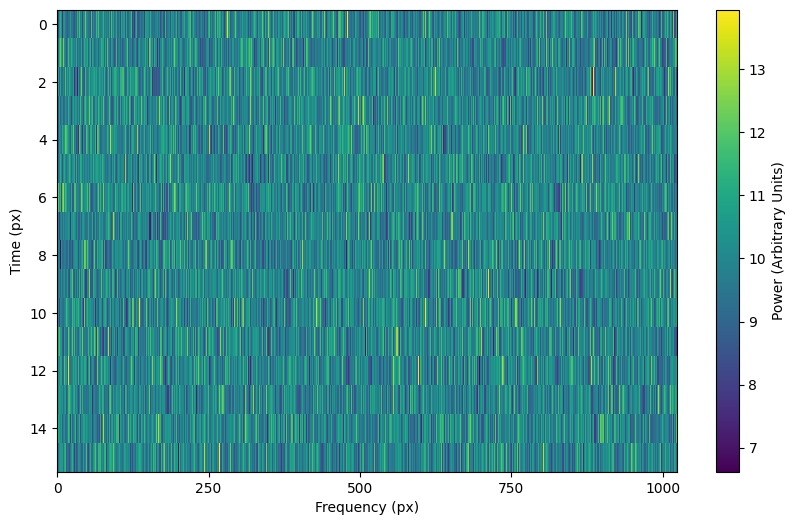

In [38]:
# Generate the signal
frame = stg.Frame(fchans=fchans,
                  tchans=tchans,
                  df=df,
                  dt=dt,
                  fch1=fch1)
noise = frame.add_noise(x_mean=10)
fig = plt.figure(figsize=(10, 6))
frame.plot("px", db=False)
fig.savefig(IMG_DIR / "basic_noise_chi2.png", bbox_inches='tight')
plt.show()

### Gaussian

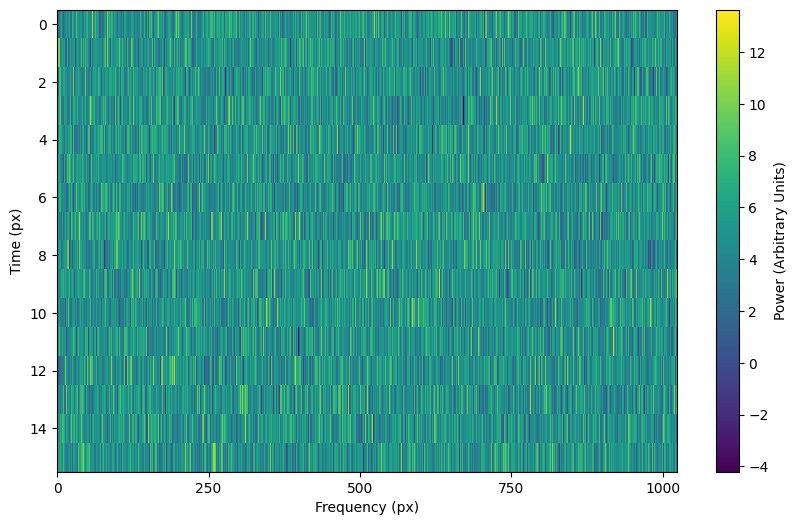

In [39]:
# Generate the signal
frame = stg.Frame(fchans=fchans,
                  tchans=tchans,
                  df=df,
                  dt=dt,
                  fch1=fch1)
noise = frame.add_noise(x_mean=5, x_std=2, noise_type='gaussian')
fig = plt.figure(figsize=(10, 6))
frame.plot("px", db=False)
fig.savefig(IMG_DIR / "basic_noise_gaussian.png", bbox_inches='tight')
plt.show()

For truncated Gaussian noise... but in reality this isn't useful.

In [40]:
noise = frame.add_noise(x_mean=5, x_std=2, x_min=0, noise_type='gaussian')

### Noise from real observations

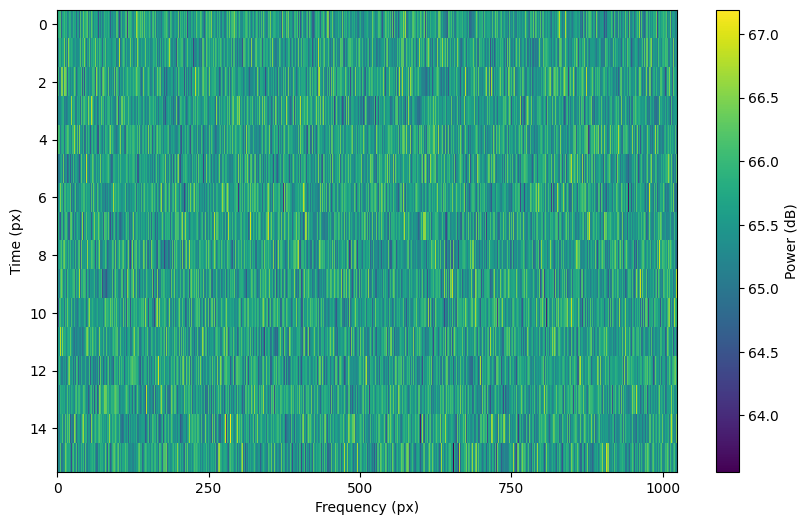

In [42]:
# Generate the signal
frame = stg.Frame(fchans=fchans,
                  tchans=tchans,
                  df=df,
                  dt=dt,
                  fch1=fch1)
noise = frame.add_noise_from_obs()
fig = plt.figure(figsize=(10, 6))
frame.plot("px", db=True)
fig.savefig(IMG_DIR / "noise_from_obs_default_chi2.png", bbox_inches='tight')
plt.show()

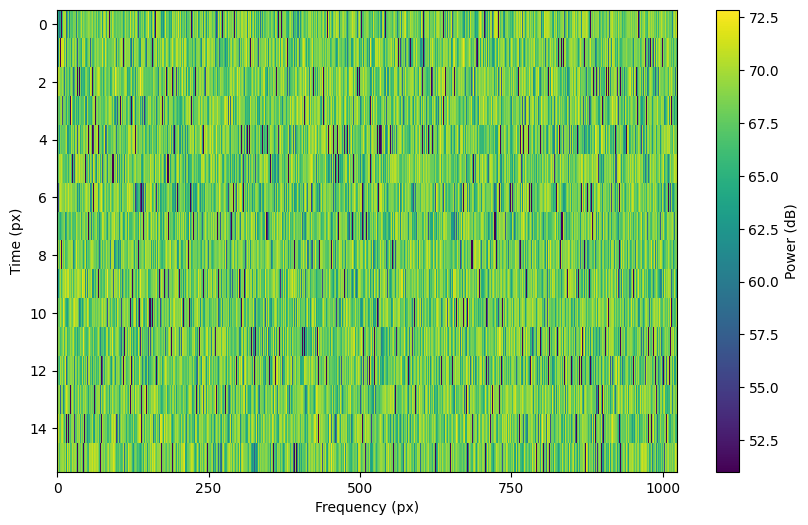

In [43]:
# Generate the signal
frame = stg.Frame(fchans=fchans,
                  tchans=tchans,
                  df=df,
                  dt=dt,
                  fch1=fch1)
noise = frame.add_noise_from_obs(noise_type='gaussian')
fig = plt.figure(figsize=(10, 6))
frame.plot("px", db=True)
fig.savefig(IMG_DIR / "noise_from_obs_default_gaussian.png", bbox_inches='tight')
plt.show()

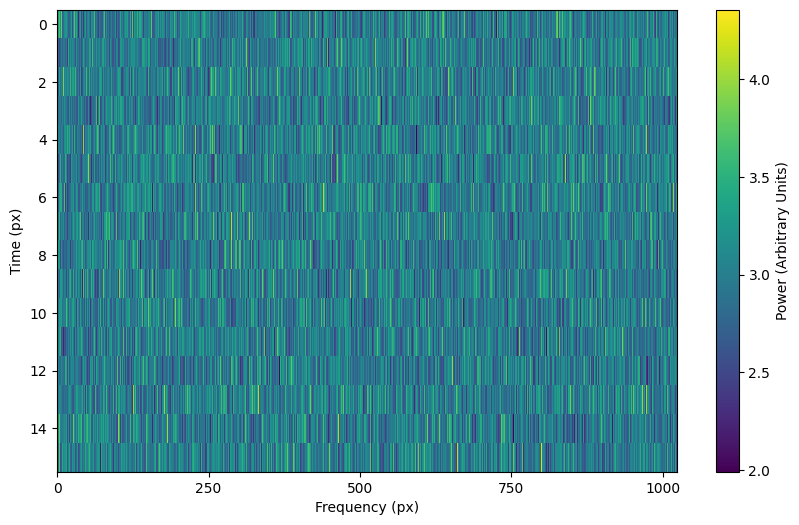

In [44]:
# Generate the signal
frame = stg.Frame(fchans=fchans,
                  tchans=tchans,
                  df=df,
                  dt=dt,
                  fch1=fch1)
noise = frame.add_noise_from_obs(x_mean_array=[3,4,5],
                                     x_std_array=[1,2,3],
                                     x_min_array=[1,2],
                                     share_index=False,
                                     noise_type='chi2')
fig = plt.figure(figsize=(10, 6))
frame.plot("px", db=False)
fig.savefig(IMG_DIR / "noise_from_obs_params.png", bbox_inches='tight')
plt.show()